Pytorch: 컴퓨터가 특정 패턴을 학습할 수 있게 도와주는 도구

In [1]:
pip install torch torchvision torchchaudio

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torchvision (from versions: none)
ERROR: No matching distribution found for torchvision


In [47]:
import torch
x = torch.tensor([[2.0, 4.4], [3.0, 6.6]])
print(x)

tensor([[2.0000, 4.4000],
        [3.0000, 6.6000]])


In [83]:
# rand: 무작위 표를 만들어줌(양수범위)
# randn: 무작위 표를 만들어줌(음수포함) 
y = torch.rand(2, 3)
print(y)

tensor([[0.2321, 0.7210, 0.5024],
        [0.5640, 0.1133, 0.7717]])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.tensor([[140.0], [150.0], [160.0], [170.0]])
y = torch.tensor([[40.0], [50.0], [60.0], [70.0]])

X = x/200
Y = y/100

model = nn.Linear(1, 1) # 입력1 -> 출력1

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(500):
    outputs = model(X)

    loss = criterion(outputs, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item(): .4f}")

new_height = torch.tensor([[175.0]]) / 200
predicted_weight = model(new_height) * 100
print(f"키 175 -> 예상 몸무게 {predicted_weight.item(): .2f}kg")

Epoch 50, Loss:  0.0183
Epoch 100, Loss:  0.0083
Epoch 150, Loss:  0.0078
Epoch 200, Loss:  0.0078
Epoch 250, Loss:  0.0078
Epoch 300, Loss:  0.0077
Epoch 350, Loss:  0.0077
Epoch 400, Loss:  0.0077
Epoch 450, Loss:  0.0076
Epoch 500, Loss:  0.0076
키 175 -> 예상 몸무게  59.64kg


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.tensor([[140.0], [150.0], [160.0], [170.0]])
y = torch.tensor([[40.0], [50.0], [60.0], [70.0]])


model = nn.Linear(1, 1) # 입력1 -> 출력1

criterion = nn.MSELoss()
# nn: neural network의 약자.
# nn.Linear -> 선형 계층
# nn.Conv2d -> 합성곱 계층
# nn.ReLU -> 활성화 함수
# nn.MSELoss -> 손실 함수
# nn.Module -> 모델 만들 때 기본 클래스

optimizer = optim.Adam(model.parameters(), lr=0.01) 
# SGD(확률적 경사하강법): 고정값으로 문제를 해결
# Adam: 최적의 값을 찾아서 문제를 해결, 학습할 때 기울기 값을 기억해둠
# lr: 얼마나 크게 앞으로 나아갈까? 
# 너무 크면 한번에 많이 나가서 학습이 잘 안됨.
# 너무 작아도 거의 움직이지 않아서 학습이 잘 안됨.
# 0.01 ~ 0.001 정도가 적당함

for epoch in range(500):
    outputs = model(x)

    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item(): .4f}")

new_height = torch.tensor([[175.0]])
predicted_weight = model(new_height)
print(f"키 {new_height.item(): .1f} -> 예상 몸무게 {predicted_weight.item(): .2f}kg")

Epoch 50, Loss:  16107.4180
Epoch 100, Loss:  4945.0303
Epoch 150, Loss:  1163.0959
Epoch 200, Loss:  235.3055
Epoch 250, Loss:  74.9329
Epoch 300, Loss:  55.6486
Epoch 350, Loss:  54.0537
Epoch 400, Loss:  53.9616
Epoch 450, Loss:  53.9541
Epoch 500, Loss:  53.9492
키  175.0 -> 예상 몸무게  62.42kg


In [94]:
import torch

X = torch.tensor([[140.0], [150.0], [160.0], [170.0], [180.0], [190.0]])
Y = torch.tensor([[40.0], [45.0], [50.0], [55.0],[60.0], [65.0]])

W = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

lr = 0.00001

for epoch in range(1000):
    Y_pred = X * W + b

    loss = ((Y_pred - Y) **2).mean()

    # optimizer.zero_grad()와 같음
    W.grad = None
    b.grad = None

    loss.backward()

    # optimizer.step()과 같음음
    W.data = W.data - lr*W.grad
    b.data = b.data - lr*b.grad

    if(epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item(): .4f}, b: {b.item(): .4f}")

new_height = torch.tensor([[175]])
predicted_weight = new_height * W + b
print(f"키 {new_height.item()} -> 예상 몸무게 {predicted_weight.item():.2f}kg")

Epoch: 10, Loss:  9.6105, b:  0.1036
Epoch: 20, Loss:  9.6056, b:  0.1035
Epoch: 30, Loss:  9.6056, b:  0.1034
Epoch: 40, Loss:  9.6055, b:  0.1034
Epoch: 50, Loss:  9.6055, b:  0.1033
Epoch: 60, Loss:  9.6055, b:  0.1032
Epoch: 70, Loss:  9.6054, b:  0.1032
Epoch: 80, Loss:  9.6054, b:  0.1031
Epoch: 90, Loss:  9.6053, b:  0.1031
Epoch: 100, Loss:  9.6053, b:  0.1030
Epoch: 110, Loss:  9.6053, b:  0.1029
Epoch: 120, Loss:  9.6052, b:  0.1029
Epoch: 130, Loss:  9.6052, b:  0.1028
Epoch: 140, Loss:  9.6051, b:  0.1027
Epoch: 150, Loss:  9.6051, b:  0.1027
Epoch: 160, Loss:  9.6050, b:  0.1026
Epoch: 170, Loss:  9.6050, b:  0.1025
Epoch: 180, Loss:  9.6050, b:  0.1025
Epoch: 190, Loss:  9.6049, b:  0.1024
Epoch: 200, Loss:  9.6049, b:  0.1024
Epoch: 210, Loss:  9.6048, b:  0.1023
Epoch: 220, Loss:  9.6048, b:  0.1022
Epoch: 230, Loss:  9.6048, b:  0.1022
Epoch: 240, Loss:  9.6047, b:  0.1021
Epoch: 250, Loss:  9.6047, b:  0.1020
Epoch: 260, Loss:  9.6046, b:  0.1020
Epoch: 270, Loss:  9.

In [97]:
pip install matplotlib

     ---------------------------------------- 0.0/108.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.5 kB ? eta -:--:--
     ---------------------- ---------------- 61.4/108.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 108.5/108.5 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 9.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.1 MB 9.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.1 MB 9.8 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.1 MB 10.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 10.3 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 11.0 MB/s eta 0:00:01
   ----------------- ---------------------- 3.6/8.1 MB 10.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.0/8.1 MB 10.7 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch: 10, Loss:  8.0471
Epoch: 20, Loss:  7.2185
Epoch: 30, Loss:  7.2322
Epoch: 40, Loss:  7.1917
Epoch: 50, Loss:  7.1414
Epoch: 60, Loss:  7.1159
Epoch: 70, Loss:  7.0940
Epoch: 80, Loss:  7.0714
Epoch: 90, Loss:  7.0478
Epoch: 100, Loss:  7.0231
Epoch: 110, Loss:  6.9976
Epoch: 120, Loss:  6.9713
Epoch: 130, Loss:  6.9444
Epoch: 140, Loss:  6.9168
Epoch: 150, Loss:  6.8886
Epoch: 160, Loss:  6.8599
Epoch: 170, Loss:  6.8307
Epoch: 180, Loss:  6.8011
Epoch: 190, Loss:  6.7712
Epoch: 200, Loss:  6.7408
Epoch: 210, Loss:  6.7101
Epoch: 220, Loss:  6.6791
Epoch: 230, Loss:  6.6478
Epoch: 240, Loss:  6.6163
Epoch: 250, Loss:  6.5845
Epoch: 260, Loss:  6.5525
Epoch: 270, Loss:  6.5203
Epoch: 280, Loss:  6.4880
Epoch: 290, Loss:  6.4555
Epoch: 300, Loss:  6.4228
Epoch: 310, Loss:  6.3900
Epoch: 320, Loss:  6.3571
Epoch: 330, Loss:  6.3241
Epoch: 340, Loss:  6.2910
Epoch: 350, Loss:  6.2579
Epoch: 360, Loss:  6.2246
Epoch: 370, Loss:  6.1913
Epoch: 380, Loss:  6.1580
Epoch: 390, Loss:  6.

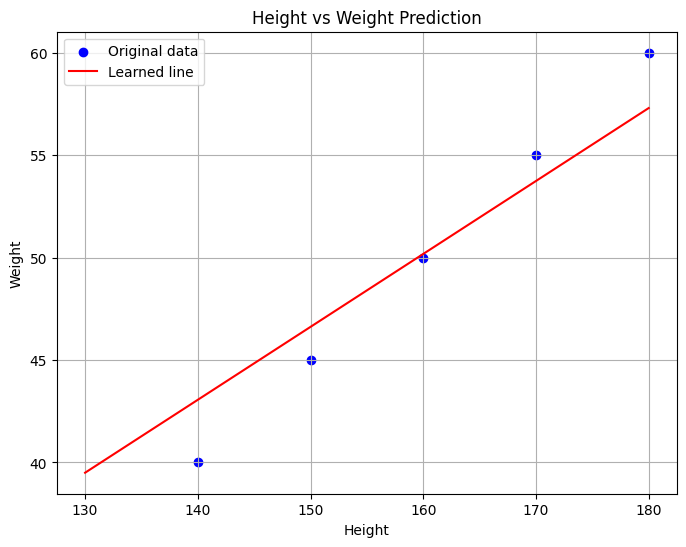

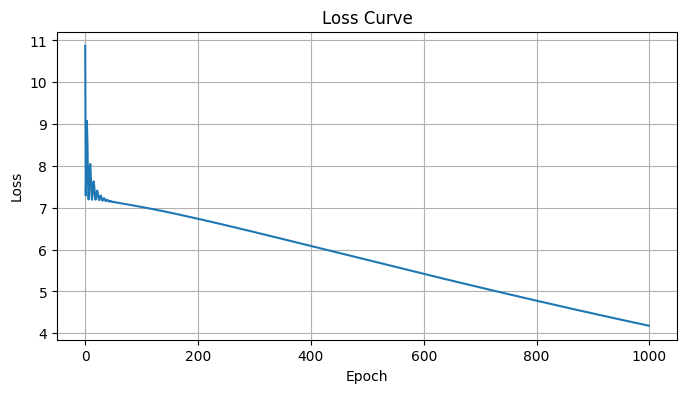

In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([[140.0], [150.0], [160.0], [170.0], [180.0]])
y = torch.tensor([[40.0], [45.0], [50.0], [55.0], [60.0]])

model = nn.Linear(1, 1)

ceriterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_list = []

for epoch in range(1000):
    outputs = model(x)
    loss = ceriterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item(): .4f}")

new_height = torch.tensor([[175.0]])
predicted_weight = model(new_height)
print(f"키 {new_height.item(): .1f}cm -> 예상 몸무게는 {predicted_weight.item(): .2f}kg")

x_numpy = x.numpy()
y_numpy = y.numpy()

x_line = torch.linspace(130, 180, 100).view(-1, 1)
y_line = model(x_line).detach().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(x_numpy, y_numpy, color='blue', label="Original data")
plt.plot(x_line.numpy(), y_line, color="red", label="Learned line")
plt.title("Height vs Weight Prediction")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(loss_list)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()